In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read data
station = pd.read_csv('../data/curated/closest_bus_station.csv')
hospital = pd.read_csv('../data/curated/closest_hospital.csv')
school = pd.read_csv('../data/curated/closest_school.csv')
price = pd.read_csv('../data/curated/mean_price_per_week.csv')

In [67]:
# Merge price and hospital
ph = pd.merge(price, hospital, how='left', on='Postcode')
ph = ph[['Postcode', 'processed_price', 'Distance', 'Duration']]
ph = ph.dropna()
ph

,Postcode,processed_price,Distance,Duration
0,3000,579.035062,2.0,9
1,3002,716.444444,0.6,3
3,3004,735.383721,3.6,8
5,3008,615.328467,0.9,3
6,3011,855.467337,1.8,5
...,...,...,...,...
411,3960,487.746000,75.2,1 hour 31
414,3976,423.260870,1.8,4
415,3977,478.225806,7.3,9
418,3981,390.000000,10.0,10


In [75]:
# Convert all the duration into mins
new_duration = []
for period in ph['Duration']:
    if 'hour' in period:
        period_list = period.split(" ")
        period = float(period_list[0]) * 60 + float(period_list[2])
        new_duration.append(period)
    else:
        period = float(period)
        new_duration.append(period)

new_data = []
for i in range(0, len(ph)):
    row = ph.iloc[i]
    duration = new_duration[i]
    new_data.append([row[0], row[1], row[2], duration])

ph = pd.DataFrame(data = new_data, columns = ['Postcode', 'processed_price', 'Distance', 'Duration'])  


,Postcode,processed_price,Distance,Duration
0,3000,579.035062,2.0,9.0
1,3002,716.444444,0.6,3.0
2,3004,735.383721,3.6,8.0
3,3008,615.328467,0.9,3.0
4,3011,855.467337,1.8,5.0
...,...,...,...,...
148,3960,487.746000,75.2,91.0
149,3976,423.260870,1.8,4.0
150,3977,478.225806,7.3,9.0
151,3981,390.000000,10.0,10.0


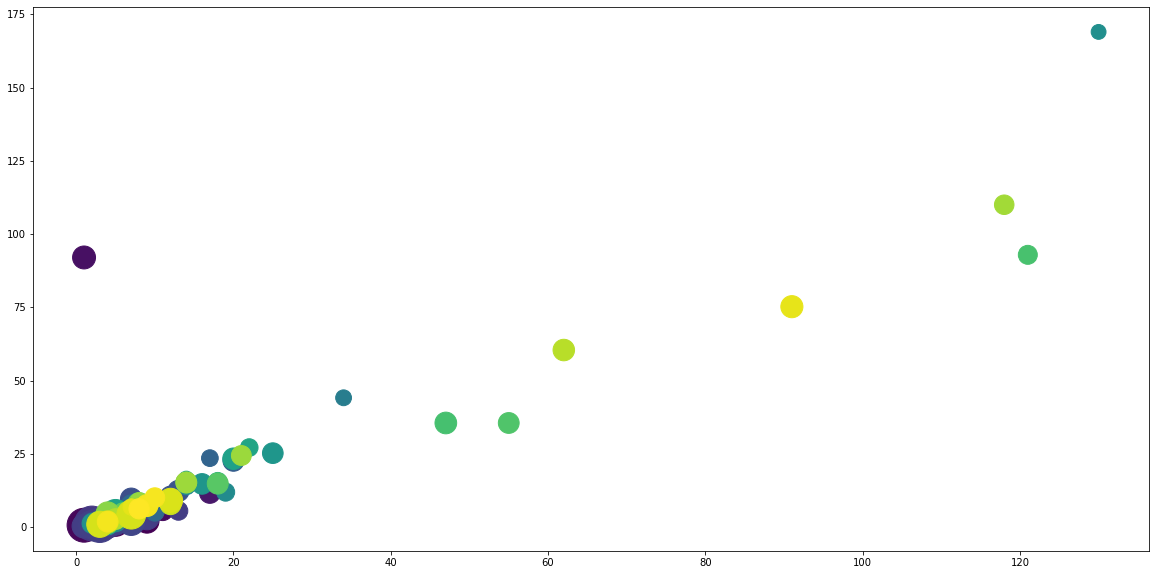

In [76]:
plt.figure(figsize=(20, 10))
plt.scatter(ph['Duration'], ph['Distance'], s=ph['processed_price'], c=ph['Postcode'], alpha=1)
plt.show()

In [30]:
# Merge price and school
psc = pd.merge(price, school, how='left', on='Postcode')
psc = psc[['Postcode', 'processed_price', 'Distance', 'Duration']]
psc = psc.dropna()

,Postcode,processed_price,Distance,Duration
0,3000,579.035062,1.1 km,5 mins
2,3003,537.307692,1.0 km,4 mins
3,3004,735.383721,1.4 km,3 mins
4,3006,625.362791,1.4 km,5 mins
5,3008,615.328467,0.9 km,3 mins
...,...,...,...,...
419,3984,441.500000,19.1 km,15 mins
420,3987,292.260000,5.2 km,8 mins
421,3992,425.000000,2.0 km,5 mins
422,3995,409.216783,4.2 km,4 mins


In [31]:
# Merge price and station
pst = pd.merge(price, station, how='left', on='Postcode')
pst = pst[['Postcode', 'processed_price', 'Distance', 'Duration']]
pst = pst.dropna()


,Postcode,processed_price,Distance,Duration
145,3177,396.346154,0.4 km,1 min
347,3802,473.500000,0.6 km,1 min
348,3803,432.500000,0.7 km,1 min
349,3804,480.000000,1.3 km,3 mins
350,3805,441.578947,0.3 km,1 min
351,3806,475.557377,0.7 km,1 min
352,3807,510.000000,1.7 km,3 mins
384,3912,631.363636,2.7 km,4 mins
413,3975,484.722222,1.4 km,3 mins
414,3976,423.260870,0.6 km,1 min
